<a href="https://colab.research.google.com/github/Deekshith238/Genrative-_AI-_2303A52104/blob/main/2303A52104_Week06_Assignment_6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment-6.1**

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - loss: 10678062546944.0000 - mse: 10678062546944.0000 - val_loss: 5278671044608.0000 - val_mse: 5278671044608.0000
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3360810860544.0000 - mse: 3360810860544.0000 - val_loss: 5135489564672.0000 - val_mse: 5135490088960.0000
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3278839742464.0000 - mse: 3278839742464.0000 - val_loss: 5886887067648.0000 - val_mse: 5886887067648.0000
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3009942650880.0000 - mse: 3009942650880.0000 - val_loss: 5093014372352.0000 - val_mse: 5093014372352.0000
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2962520801280.0000 - mse: 2962520801280.0000 - val_loss: 5055111495680.0000 - val_mse: 5055111495680.0000
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2852191207424.0000 - mse: 2852191207424.0000 - val_loss: 5373989748736.0000 - val_mse: 5373989748736.0000
Epoch 7/100
28/28 ━━

Training MSE: 3092889206784.0, Testing MSE: 5213342662656.0


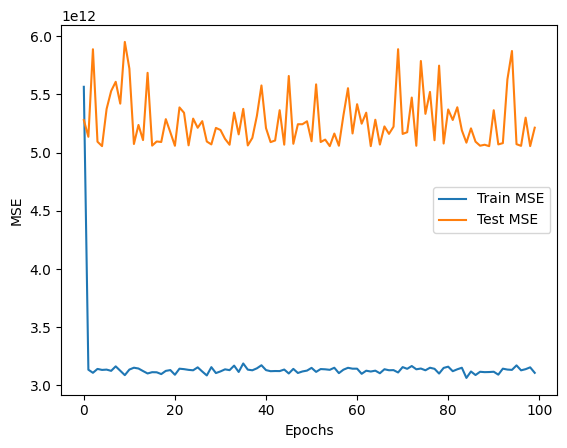

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

url = 'https://drive.google.com/uc?id=1AcdENlVm5dccNyo_vgdMbneX8YVvH5R3'
df = pd.read_csv(url)

print(df.columns)
df.columns = df.columns.str.strip()

if 'Price' in df.columns:
    target_column = 'Price'
elif 'price' in df.columns:
    target_column = 'price'
else:
    raise KeyError("Target column not found. Check dataset column names.")

X = df.drop(columns=[target_column])
y = df[target_column]

categorical_columns = X.select_dtypes(include=['object']).columns

X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build ANN model
model = Sequential([
    Dense(15, activation='tanh', input_shape=(X_train.shape[1],)),
    Dense(20, activation='tanh'),
    Dense(15, activation='tanh'),
    Dense(1, activation='linear')  # Regression output
])

# Compile model
model.compile(optimizer=keras.optimizers.SGD(), loss='mse', metrics=['mse'])

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

# Evaluate model
train_mse = model.evaluate(X_train, y_train, verbose=0)[1]
test_mse = model.evaluate(X_test, y_test, verbose=0)[1]
print(f'Training MSE: {train_mse}, Testing MSE: {test_mse}')

# Save model
model.save('housing_price_model.h5')

# Plot training history
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Load and use model
def predict_price(features):
    loaded_model = keras.models.load_model('housing_price_model.h5')
    features = scaler.transform([features])  # Scale input
    return loaded_model.predict(features)[0][0]

# Example usage
# sample_features = X_test[0]  # Replace with actual sample
# print(predict_price(sample_features))